In [2]:
#---Plotting with Pandas---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
#to see the provided styles
plt.style.available

['seaborn-darkgrid',
 'grayscale',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-dark',
 '_classic_test',
 'dark_background',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-muted',
 'bmh',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-pastel',
 'ggplot',
 'classic',
 'tableau-colorblind10',
 'seaborn',
 'seaborn-deep']

In [4]:
#changing the default color pallet in our plot to be more friendly with colorblind people
plt.style.use('seaborn-colorblind')

In [5]:
#Making a dataframe with DataFrame.plot
#cumsum quratevly sums an array
#daterange makes the index every day in 2017
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                 index = pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


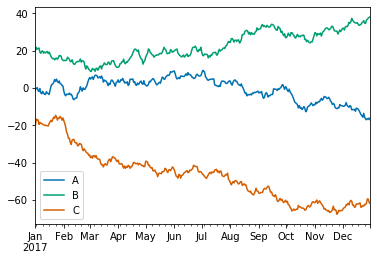

In [6]:
#visualizing the data using the plot method on the df
df.plot(); #; is to supress unwanted output

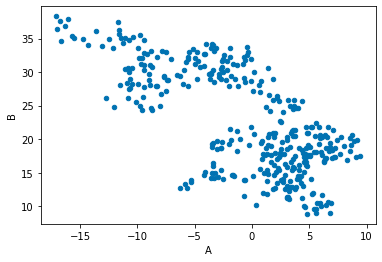

In [7]:
#selecting which plot we want to use with the kind parameter
df.plot('A', 'B', kind = 'scatter');

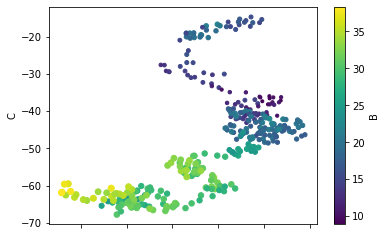

In [8]:
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis') #size and color changing based on the values on the b column

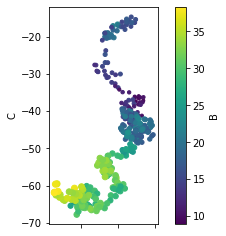

In [9]:
#changing the aspect ratio of the axis subplot to equal
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

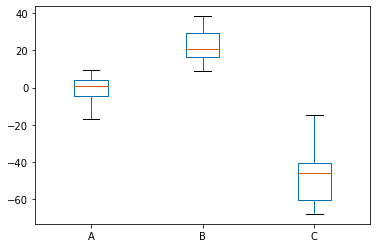

In [10]:
#boxplots in pandas
df.plot.box();

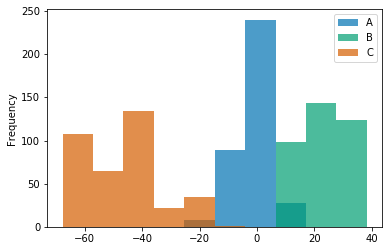

In [11]:
#histograms
df.plot.hist(alpha=0.7);

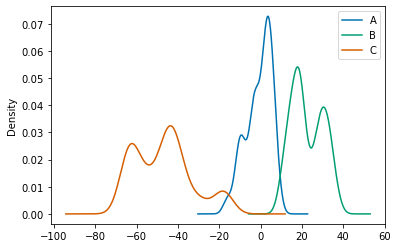

In [12]:
#kernel estimate density plots
#this one is pretty cool
df.plot.kde();

In [13]:
#pandas.tools.plotting
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


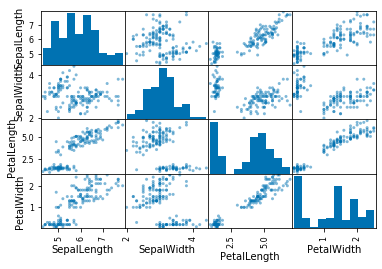

In [15]:
#a scatter matrix is a way of comparing each column in a dataframe to every other column in a pair-wise fashion
#useful to see the most obvious patterns in the dataset

#pd.tools.plotting.scatter_matrix(iris); this code isn't valide anymore 
pd.plotting.scatter_matrix(iris);

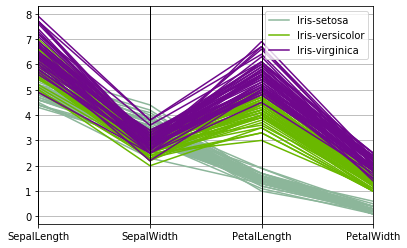

In [16]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

In [17]:
#---Seaborn---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [21]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


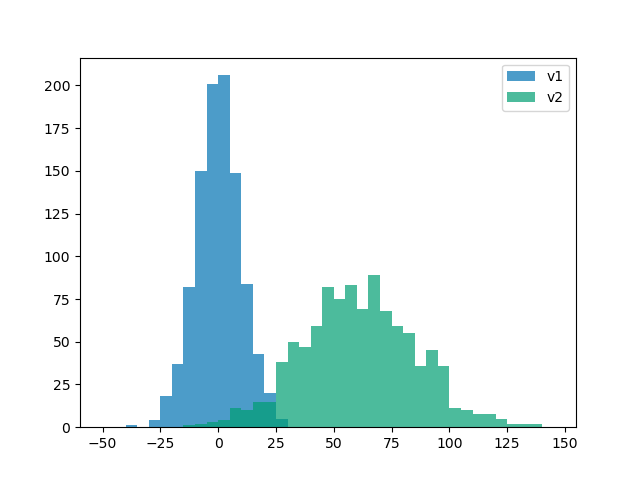

In [22]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend(); #this makes sure that both histograms are equivalent in bin sizes

<IPython.core.display.Javascript object>


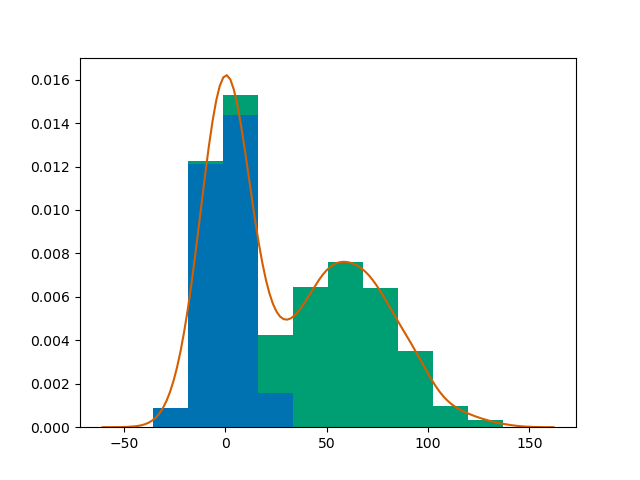

In [24]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True)
v3 = np.concatenate((v1,v2))
#we'll use this to plot a kernel density over the stacked histogram, it allows us to see the
#relationship between both
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


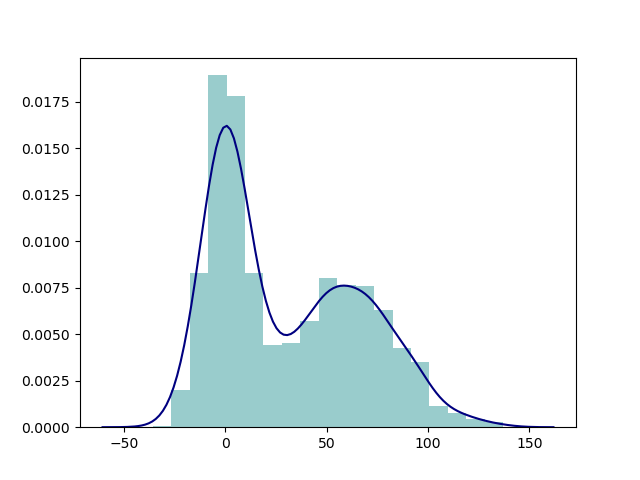

In [25]:
plt.figure()
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


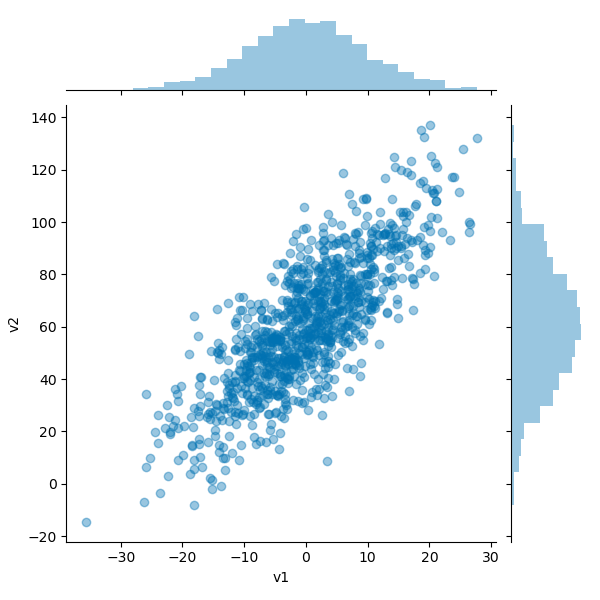

In [26]:
#the joint plot creates a scatter plot along the histograms for each variable on the axis
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


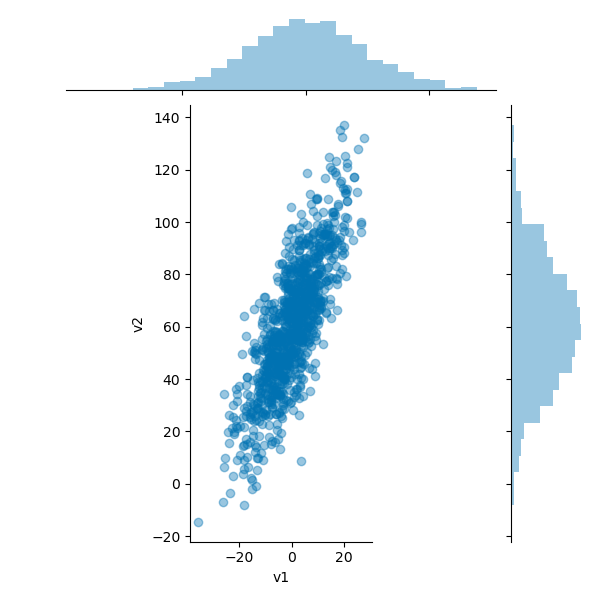

In [27]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


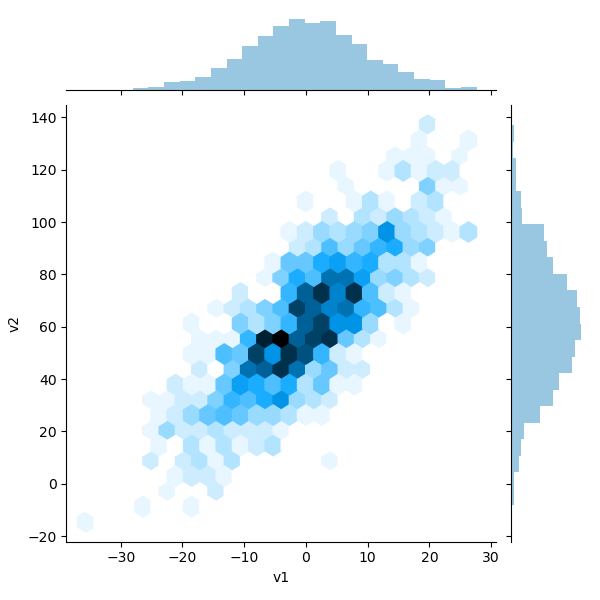

In [28]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


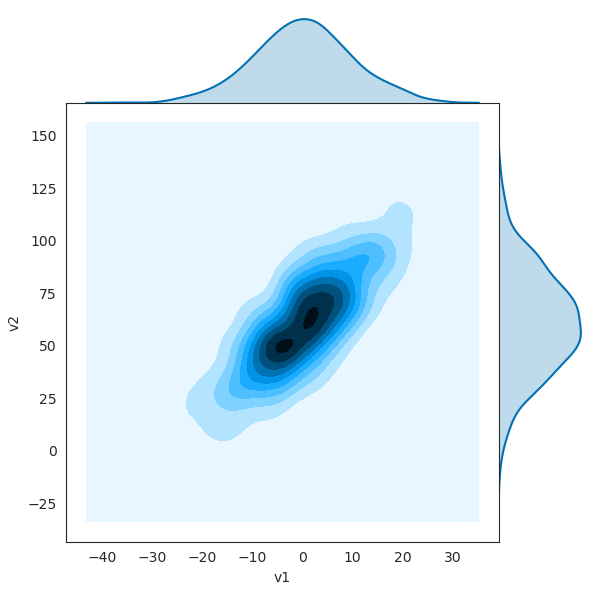

In [29]:
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [30]:
#how seaborn handles visualization of categorical data
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


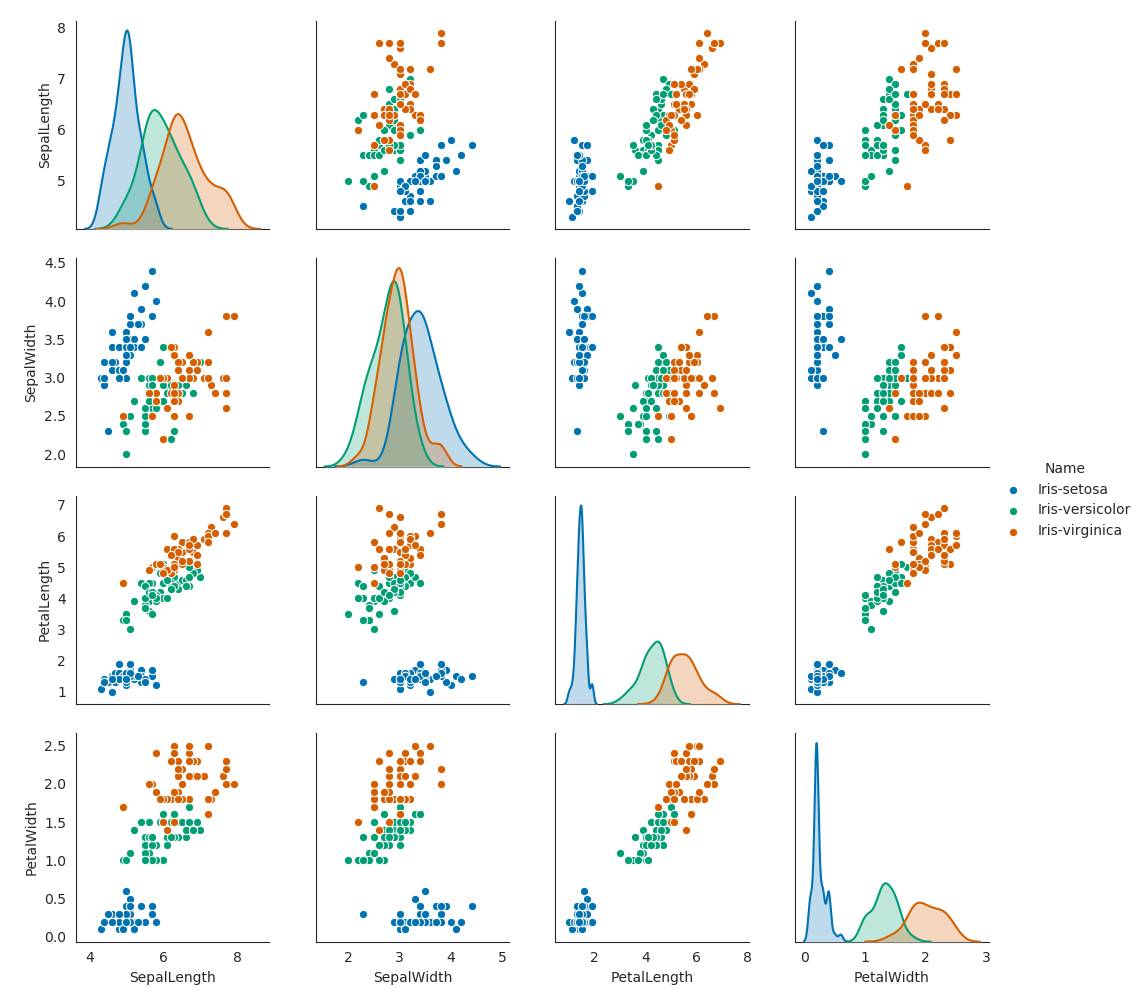

In [31]:
sns.pairplot(iris, hue='Name', diag_kind='kde');

<IPython.core.display.Javascript object>


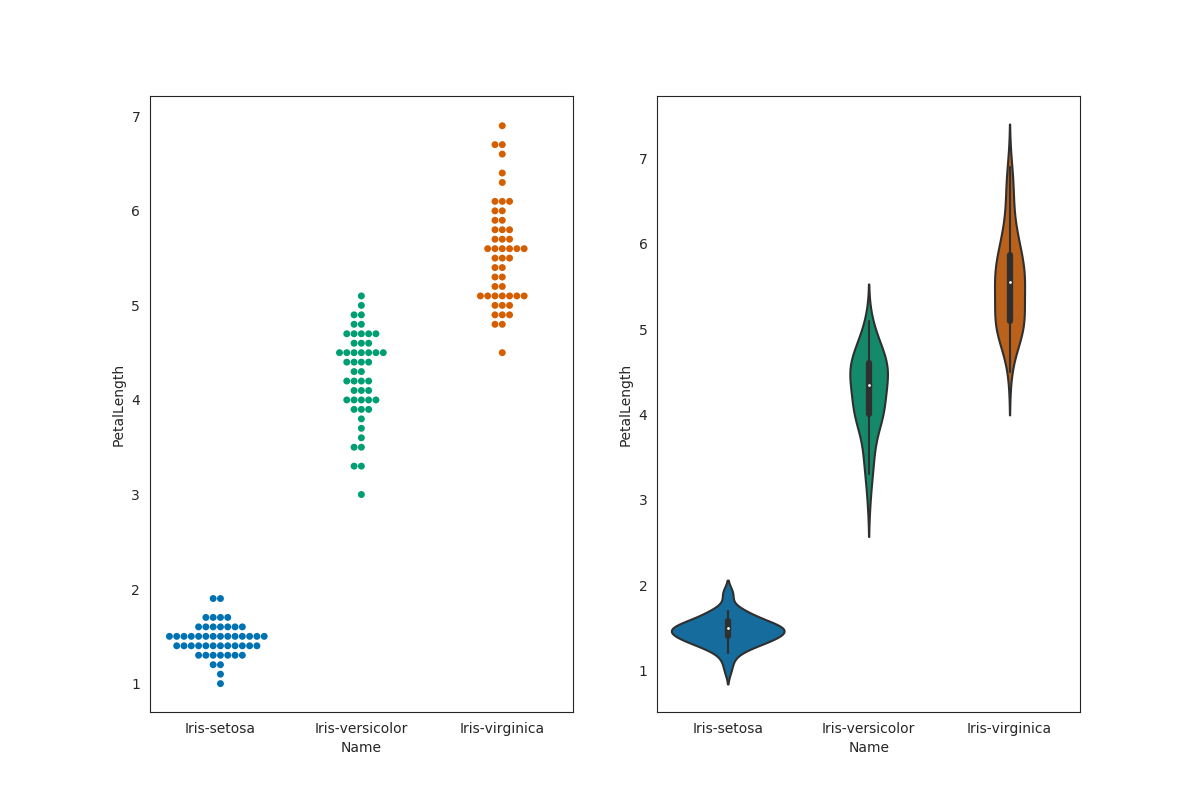

In [33]:
#violin plots
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);